# Complex pollen diagram

This is an example of bars, stacked, lines and area plots in one single diagram.

We display pollen count data from the site Hoya del Castillo in Spain collected by [Davis and Stevenson (2007)](#Davis2007) obtained from the [European pollen database (EPD)](http://www.europeanpollendatabase.net/index.php). We extended this data by two additional columns: summer (JJA) and winter (DJF) temperature.

We start by importing the necessary libraries. We use `pandas` to read and manage the pollen data and `stratplot` for it's visualization.

In [1]:
import psyplot.project as psy
import pandas as pd
from psy_strat.stratplot import stratplot
import matplotlib.pyplot as plt
import matplotlib as mpl

/Users/psommer/miniconda/envs/work/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/psommer/miniconda/envs/work/lib/python3.7/site-packages/xarray/core/merge.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


Adjusting the figure size and dpi improves the readability of the plots in this notebook.

In [2]:
%matplotlib inline
mpl.rcParams['figure.figsize'] = (16, 10)
mpl.rcParams['figure.dpi'] = 300

The data is stored as a comma-separated text file that can be loaded into a `pandas.DataFrame` using pandas `pandas.read_csv` function:

In [3]:
df = pd.read_csv('pollen-data.csv', index_col='agebp')
print(df.shape)
df.head(5)

(34, 37)


,DJF Temperature,JJA Temperature,Alnus,Anthemis-type,Artemisia,Betula,Bidens-type,Carpinus,Caryophyllaceae,Cerealia-type,...,Plantago coronopus,Plantago major/P. media,Plantago maritima,Potamogeton,Pteridium,Quercus ilex-type,Quercus suber-type,Ruppia,Sparganium,Ulmus
agebp,,,,,,,,,,,,,,,,,,,,,
4690,5.6125,21.1750,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN
4890,6.3375,21.8250,1.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,...,7.0,3.0,NaN,NaN,2.0,13.0,NaN,NaN,NaN,NaN
5087,6.2750,21.8750,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,...,8.0,1.0,NaN,NaN,NaN,21.0,NaN,1.0,NaN,NaN
5278,4.8750,20.8250,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,24.0,NaN,3.0,NaN,NaN
5465,2.2750,20.3125,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,18.0,NaN,1.0,NaN,NaN


This data contains 34 samples and 37 columns. Note that we chose the DataFrame to be indexed by the `'agebp'` column. This will be the vertical axis of our stratigraphic diagram that is shared between all the variables.

Now we can display this dataframe using `stratplot`:

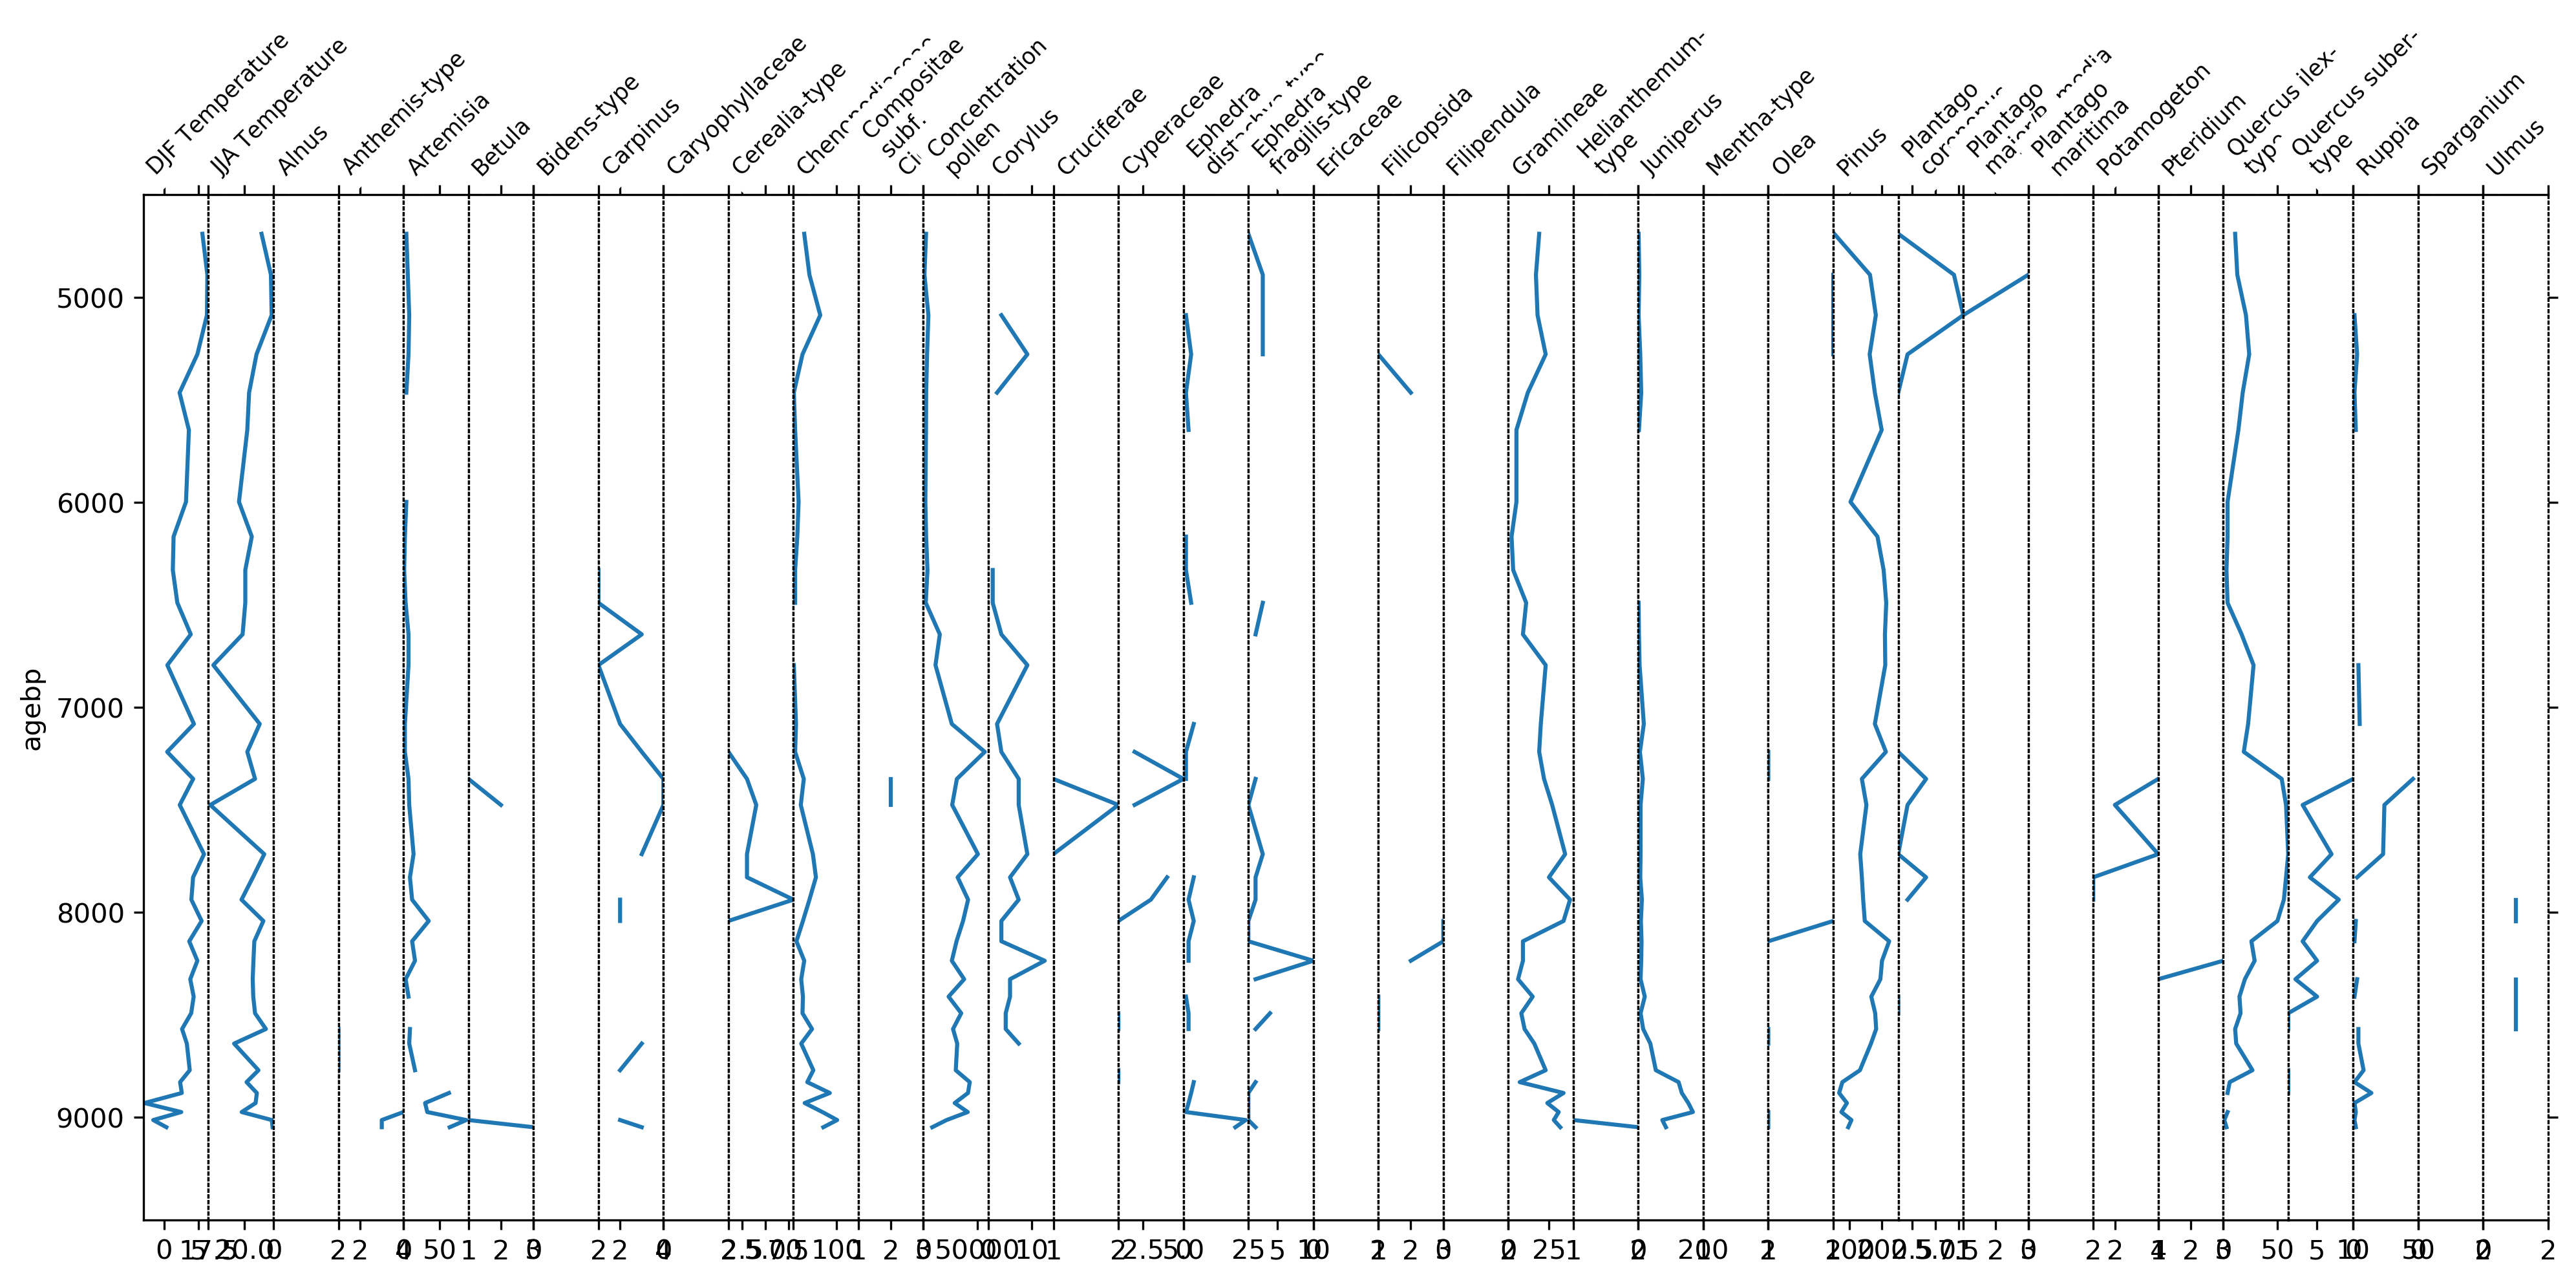

In [4]:
sp, groupers = stratplot(df)

You see now one plot for each column in the above dataframe. However, this figure is not very informative. The x-axis labels are hardly readable and the taxa all have different scalings. We can significantly improve this plot by grouping the variables together.

Luckily, the EPD comes with a mapping from taxon name to group names. This mapping is stored in the tab separated file `epd-groups.tsv`:

In [5]:
groups = pd.read_csv('epd-groups.tsv', delimiter='\t', index_col=0)
groups.head(5)

,groupname
varname,
Abies,Trees and shrubs
Abies undiff.,Trees and shrubs
Acacia,Trees and shrubs
Acer,Trees and shrubs
Acer cf. A. campestre,Trees and shrubs


Using this data, we can group the columns in our DataFrame using the following function:

In [6]:
def grouper(col):
    if 'Temperature' in col:
        return 'Temperature'
    else:
        return groups.groupname.loc[col]

And have a look into how this functions groups our data:

In [7]:
group2taxon = pd.DataFrame.from_dict(df.groupby(grouper, axis=1).groups, orient='index').T
group2taxon.fillna('')

,Aquatics,Dwarf shrubs,Helophytes,Herbs,Nonpollen,Temperature,Trees and shrubs,Vascular cryptogams (Pteridophytes)
0,Potamogeton,Ericaceae,Sparganium,Anthemis-type,Concentration pollen,DJF Temperature,Alnus,Filicopsida
1,Ruppia,,,Artemisia,,JJA Temperature,Betula,Pteridium
2,,,,Bidens-type,,,Carpinus,
3,,,,Caryophyllaceae,,,Corylus,
4,,,,Cerealia-type,,,Ephedra distachya-type,
5,,,,Chenopodiaceae,,,Ephedra fragilis-type,
6,,,,Compositae subf. Cichorioideae,,,Juniperus,
7,,,,Cruciferae,,,Olea,
8,,,,Cyperaceae,,,Pinus,
9,,,,Filipendula,,,Quercus ilex-type,


For our pollen diagram, we are actually only interested in Temperature, Herbs, Trees and shrubs. Therefore we can exclude the other groups from our plot using the *exclude* parameter of `stratplot`. Additionally we transform the pollen counts into percentages to get a better scaling of the diagram. Since *Trees and shrubs* and *Herbs* should both be considered when calculating the percentages, we additionally put them into a larger *Pollen* group. 

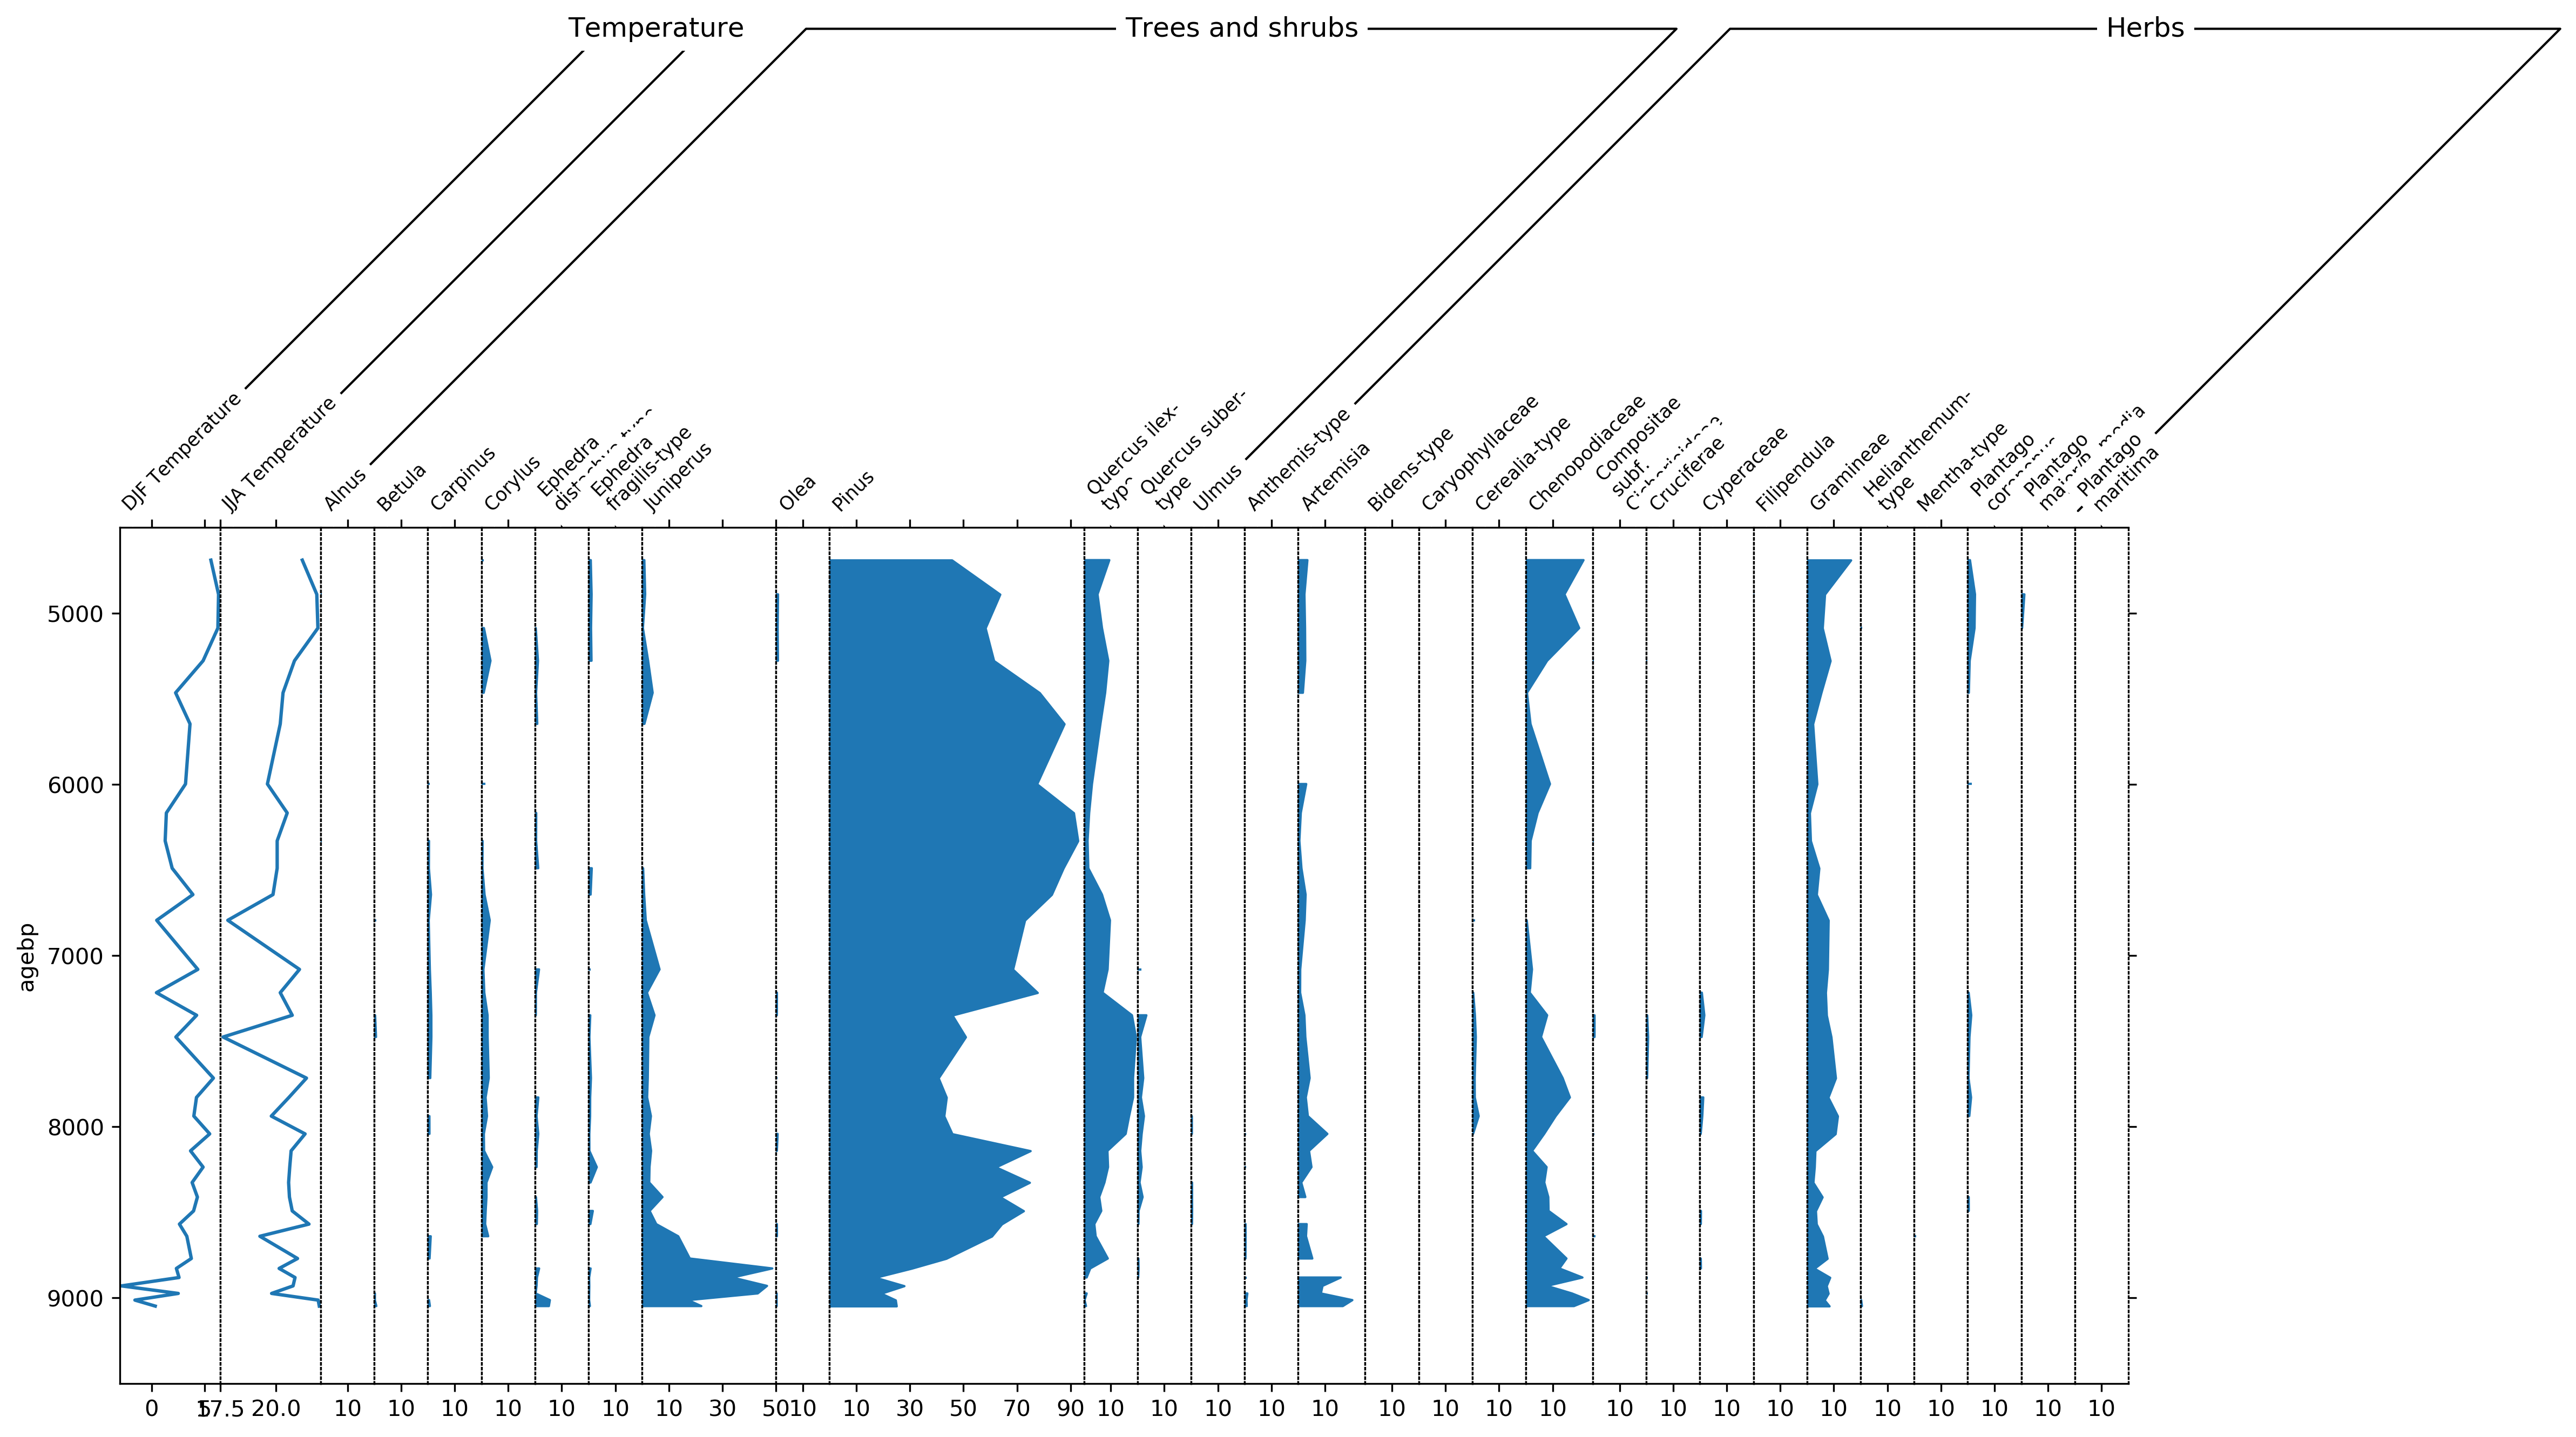

In [8]:
sp, groupers = stratplot(
    df, grouper,
    widths={'Temperature': 0.1, 'Pollen': 0.9},
    percentages=['Pollen'],
    subgroups={'Pollen': ['Trees and shrubs', 'Herbs']},
    exclude=['Aquatics', 'Dwarf shrubs', 'Helophytes', 'Nonpollen',
             'Vascular cryptogams (Pteridophytes)'])

This diagram already looks much better, however there are still to many taxa in there that have only very little amount of data. Therefore we use the *thresh* parameter to set a threshold of 1%. Every taxon now that is never above 1% will not be displayed.

Additionally we apply a new order to the columns such that we put Juniperus, Pinus and Quercus ilex-type, and then the other trees and shrubs to the left. Note that, if you run this in the psyplot GUI, you can change the order of the variables more easily without scripting. However, it is also not so difficult using the `reorder` method of the grouper for the *pollen* variables.

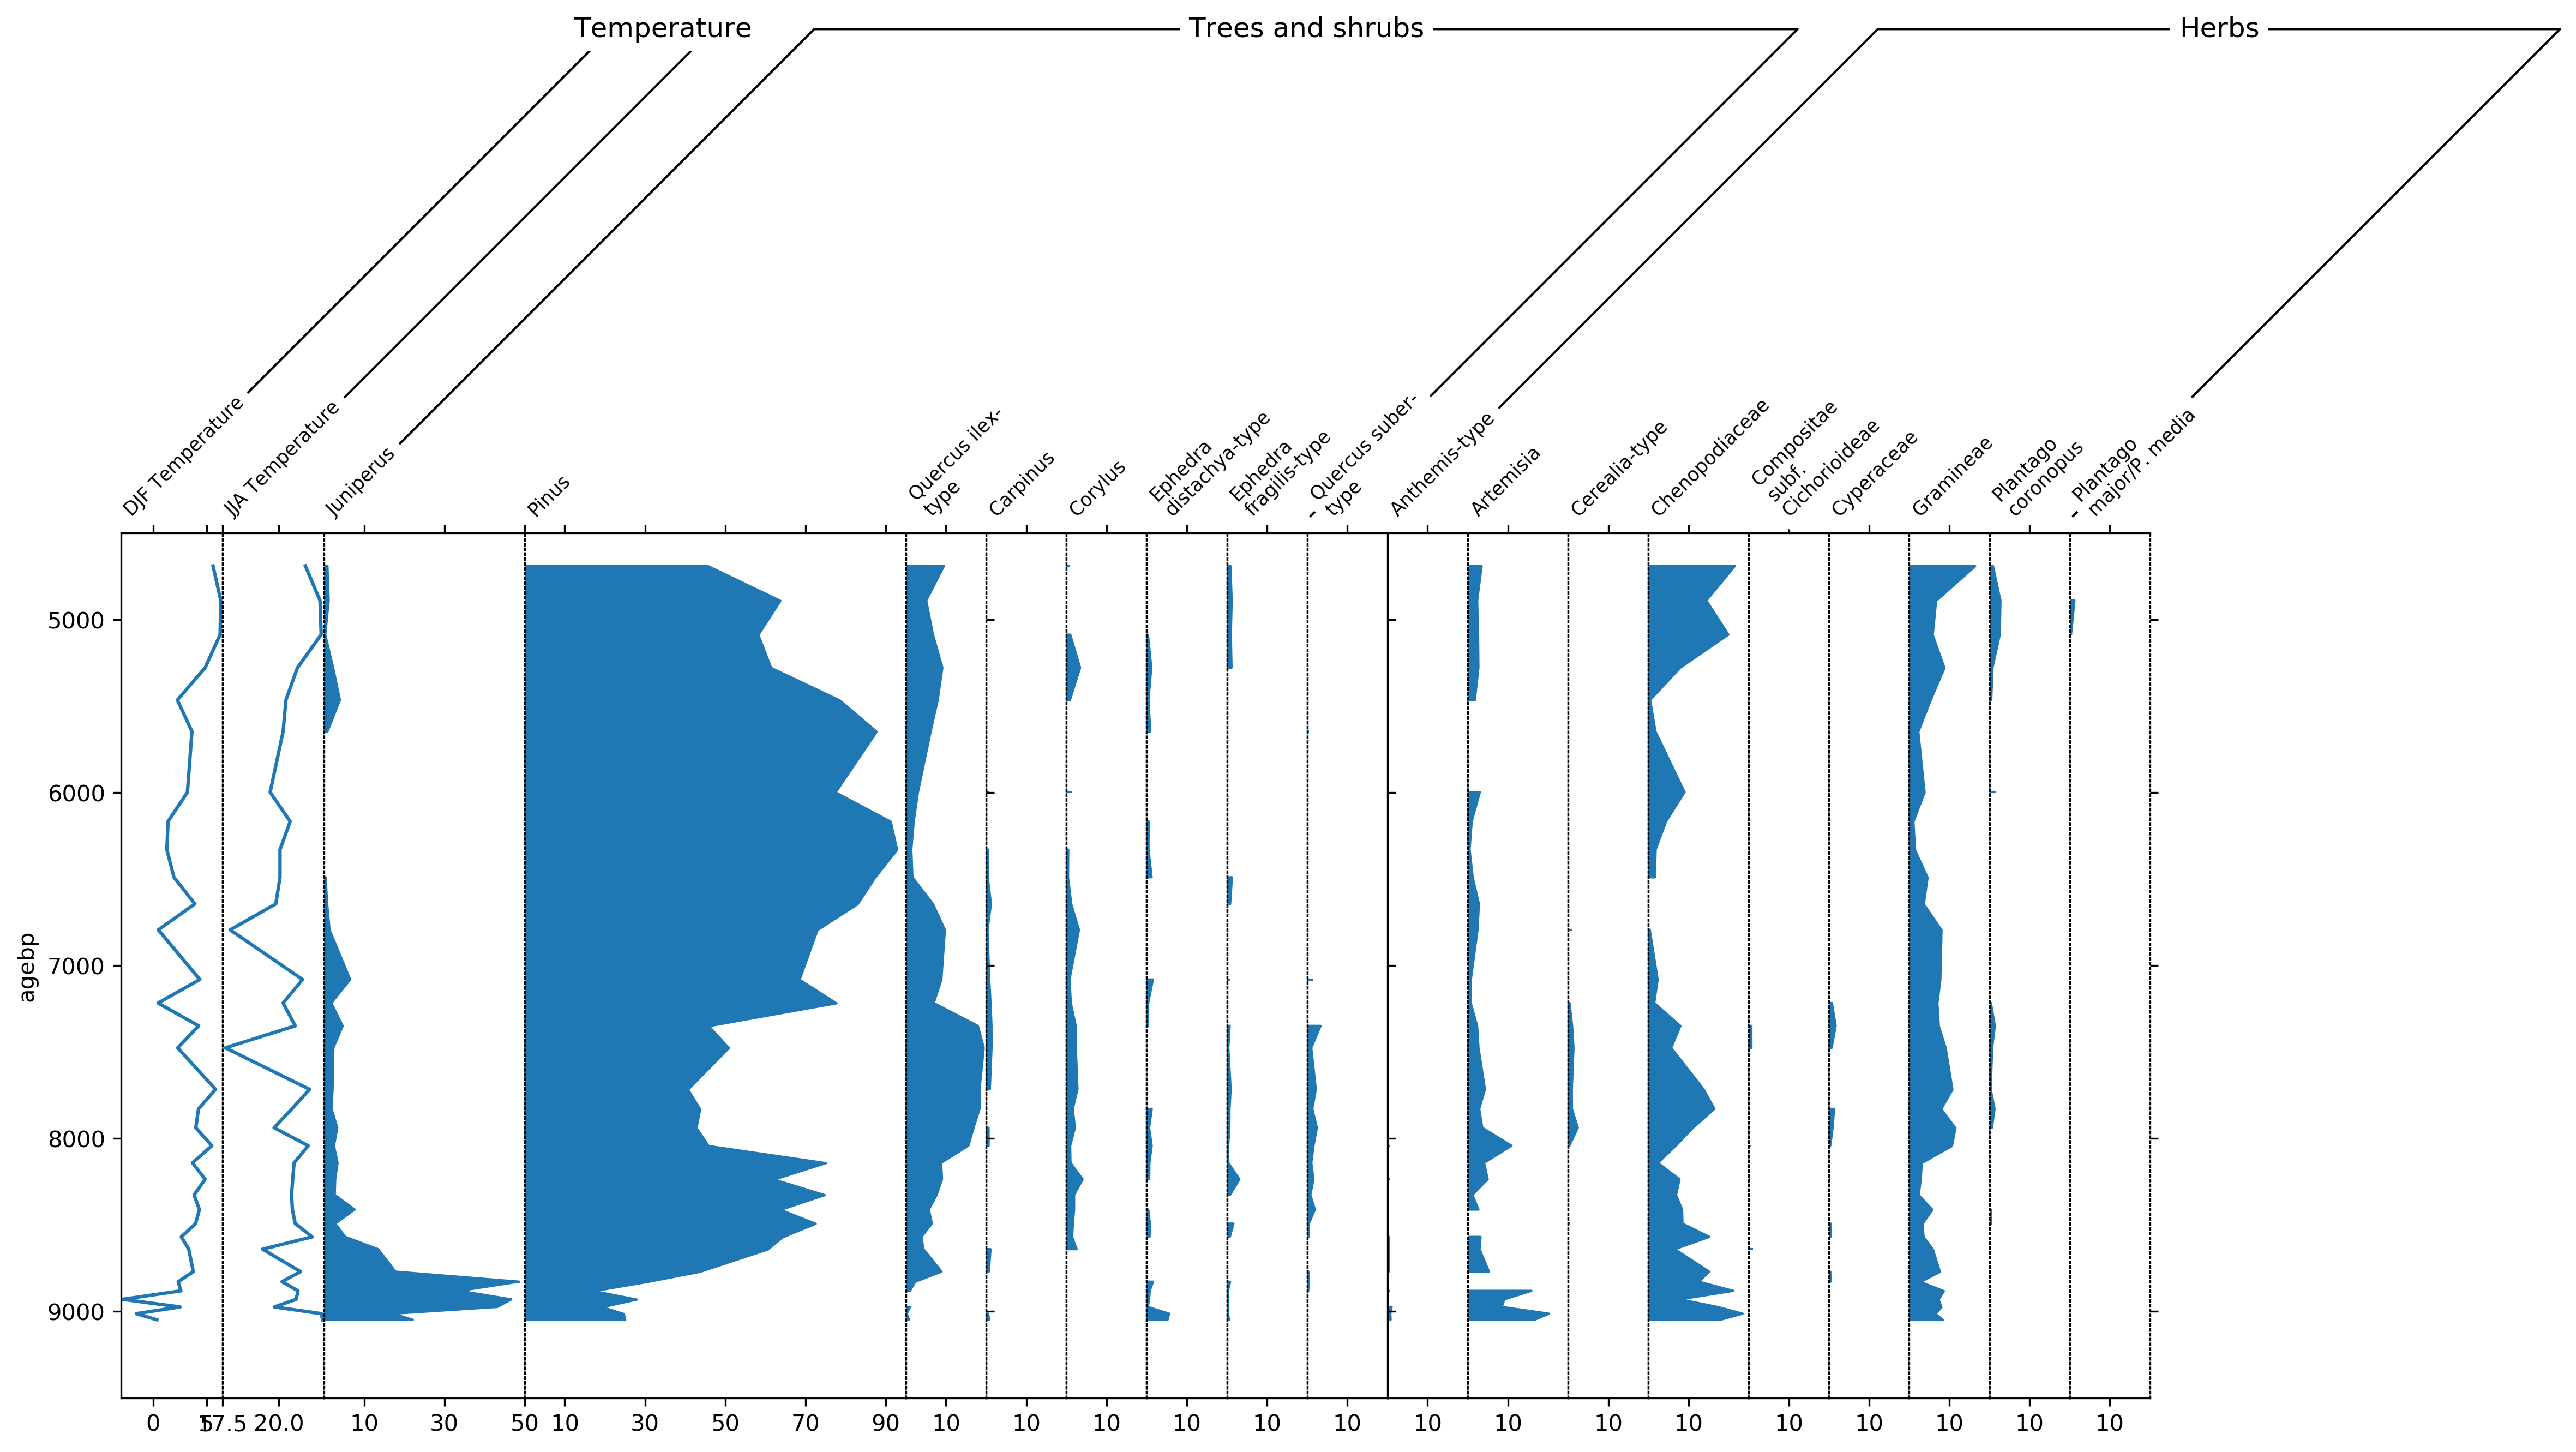

In [9]:
sp, groupers = stratplot(
    df, grouper,
    thresh=1.0,
    widths={'Temperature': 0.1, 'Pollen': 0.9},
    percentages=['Pollen'],
    subgroups={'Pollen': ['Trees and shrubs', 'Herbs']},
    exclude=['Aquatics', 'Dwarf shrubs', 'Helophytes', 'Nonpollen',
             'Vascular cryptogams (Pteridophytes)'])

# apply a new order where we first display Juniperus, Pinus and Quercus, and then the rest
pollen_grouper = groupers[1]
first_taxa = ['Juniperus', 'Pinus', 'Quercus ilex-type']
remaining_trees = group2taxon['Trees and shrubs'][
    ~group2taxon['Trees and shrubs'].isin(first_taxa)].dropna().tolist()

neworder = first_taxa + remaining_trees
pollen_grouper.reorder(neworder)

Finally, we can display the temperature columns in one single diagram because they share the same units. This is done using the *all_in_one* parameter. Additionally we can include a sum of the different pollen subgroups using the *summed* parameter.

/Users/psommer/miniconda/envs/work/lib/python3.7/site-packages/xarray/core/dataarray.py:1619: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  3: pd.Panel}


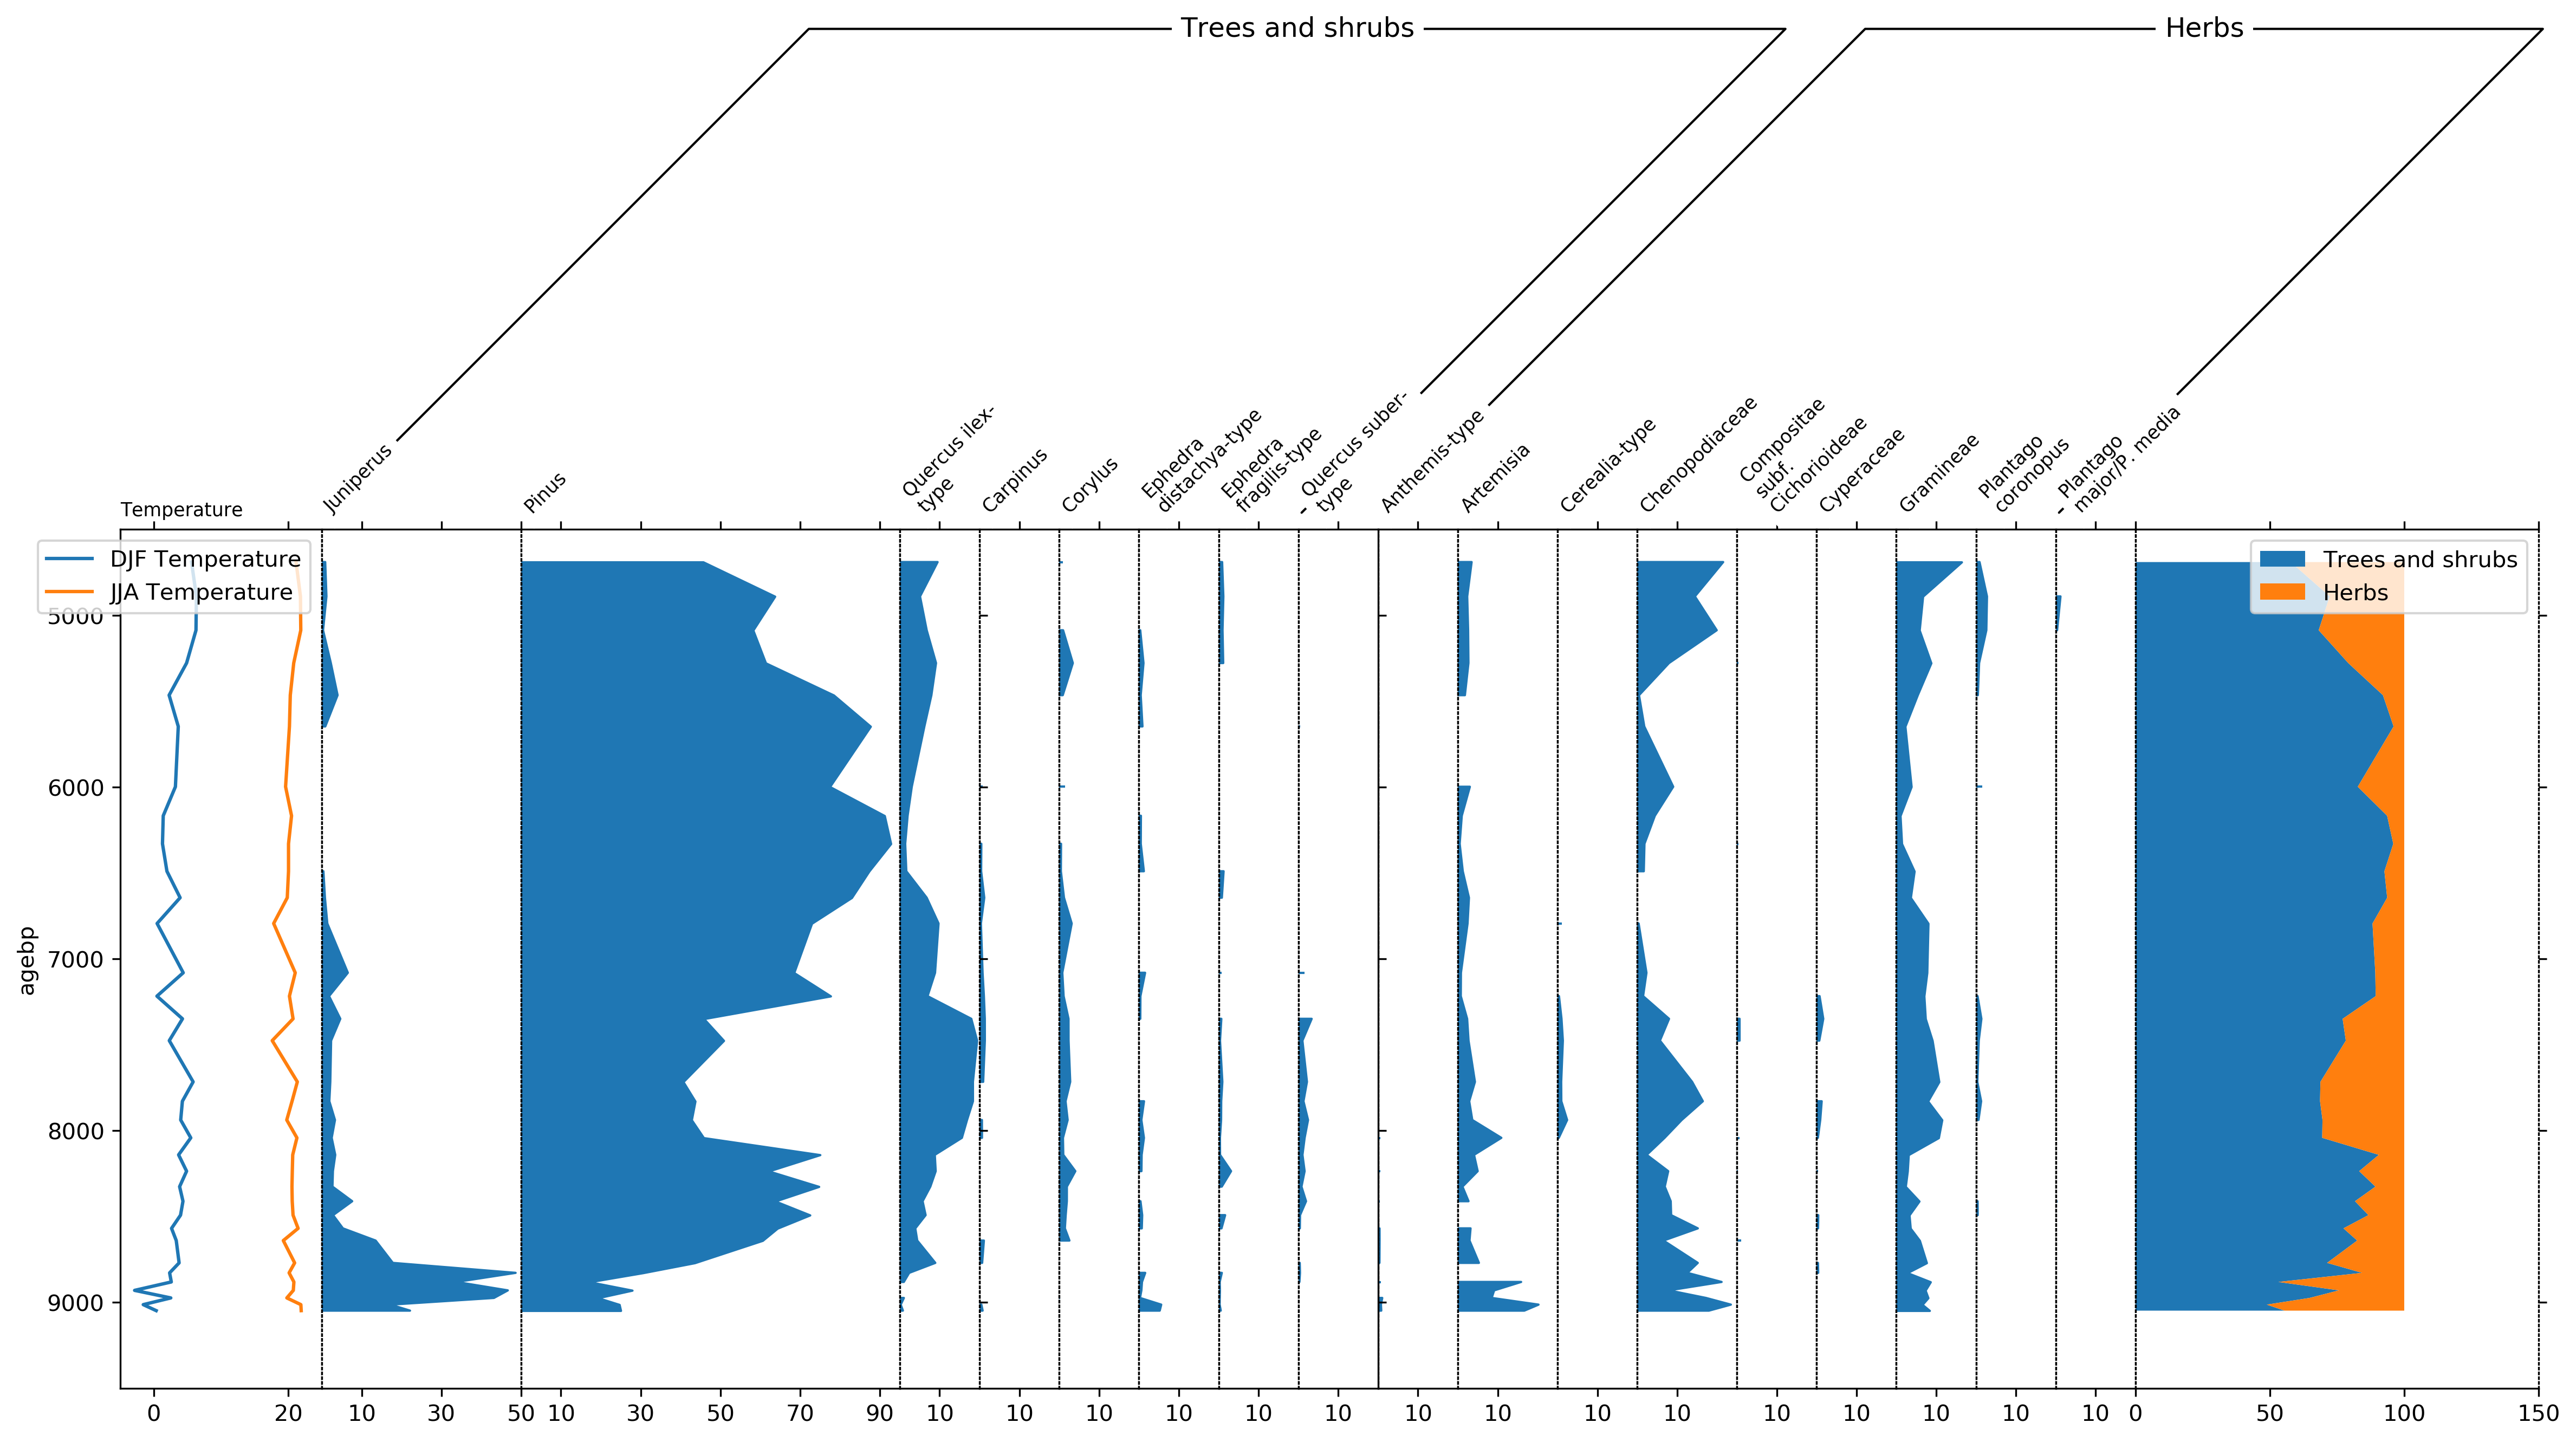

In [10]:
sp, groupers = stratplot(
    df, grouper,
    thresh=1.0,
    all_in_one=['Temperature'],
    summed=['Trees and shrubs', 'Herbs'],
    widths={'Temperature': 0.1, 'Pollen': 0.9},
    percentages=['Pollen'],
    subgroups={'Pollen': ['Trees and shrubs', 'Herbs']},
    exclude=['Aquatics', 'Dwarf shrubs', 'Helophytes', 'Nonpollen',
             'Vascular cryptogams (Pteridophytes)'])

# apply a new order where we first display Juniperus, Pinus and Quercus, and then the rest
pollen_grouper = groupers[1]
first_taxa = ['Juniperus', 'Pinus', 'Quercus ilex-type']
remaining_trees = group2taxon['Trees and shrubs'][
    ~group2taxon['Trees and shrubs'].isin(first_taxa)].dropna().tolist()

neworder = first_taxa + remaining_trees
pollen_grouper.reorder(neworder)

Last but not least, let's talk a bit about the final layout. To better distinguish herbs from Trees and shrubs, we can display this group using a bar plot by making use of the *use_bars* parameter of `stratplot`. Furthermore we decrease the size of the groupers and increase the height of the plot using the `trunc_height` parameter.

Additionally we can use the psyplot framework to do some changes to the colors, etc..:

- display trees in green
- exaggerate the trees by a factor of 4
- highlight low pollen occurences below 1% with a `+`
- change the JJA temperature curve to red
- change the legendlabels for temperature
- change x- and y-label for temperature

This modifications make the plot look much nicer!

/Users/psommer/Documents/myplots-scripts/psy-strat/psy_strat/plotters.py:382: RuntimeWarning: invalid value encountered in greater_equal
  mask = (arr.values >= vmin) & (arr.values <= vmax)
/Users/psommer/Documents/myplots-scripts/psy-strat/psy_strat/plotters.py:382: RuntimeWarning: invalid value encountered in less_equal
  mask = (arr.values >= vmin) & (arr.values <= vmax)


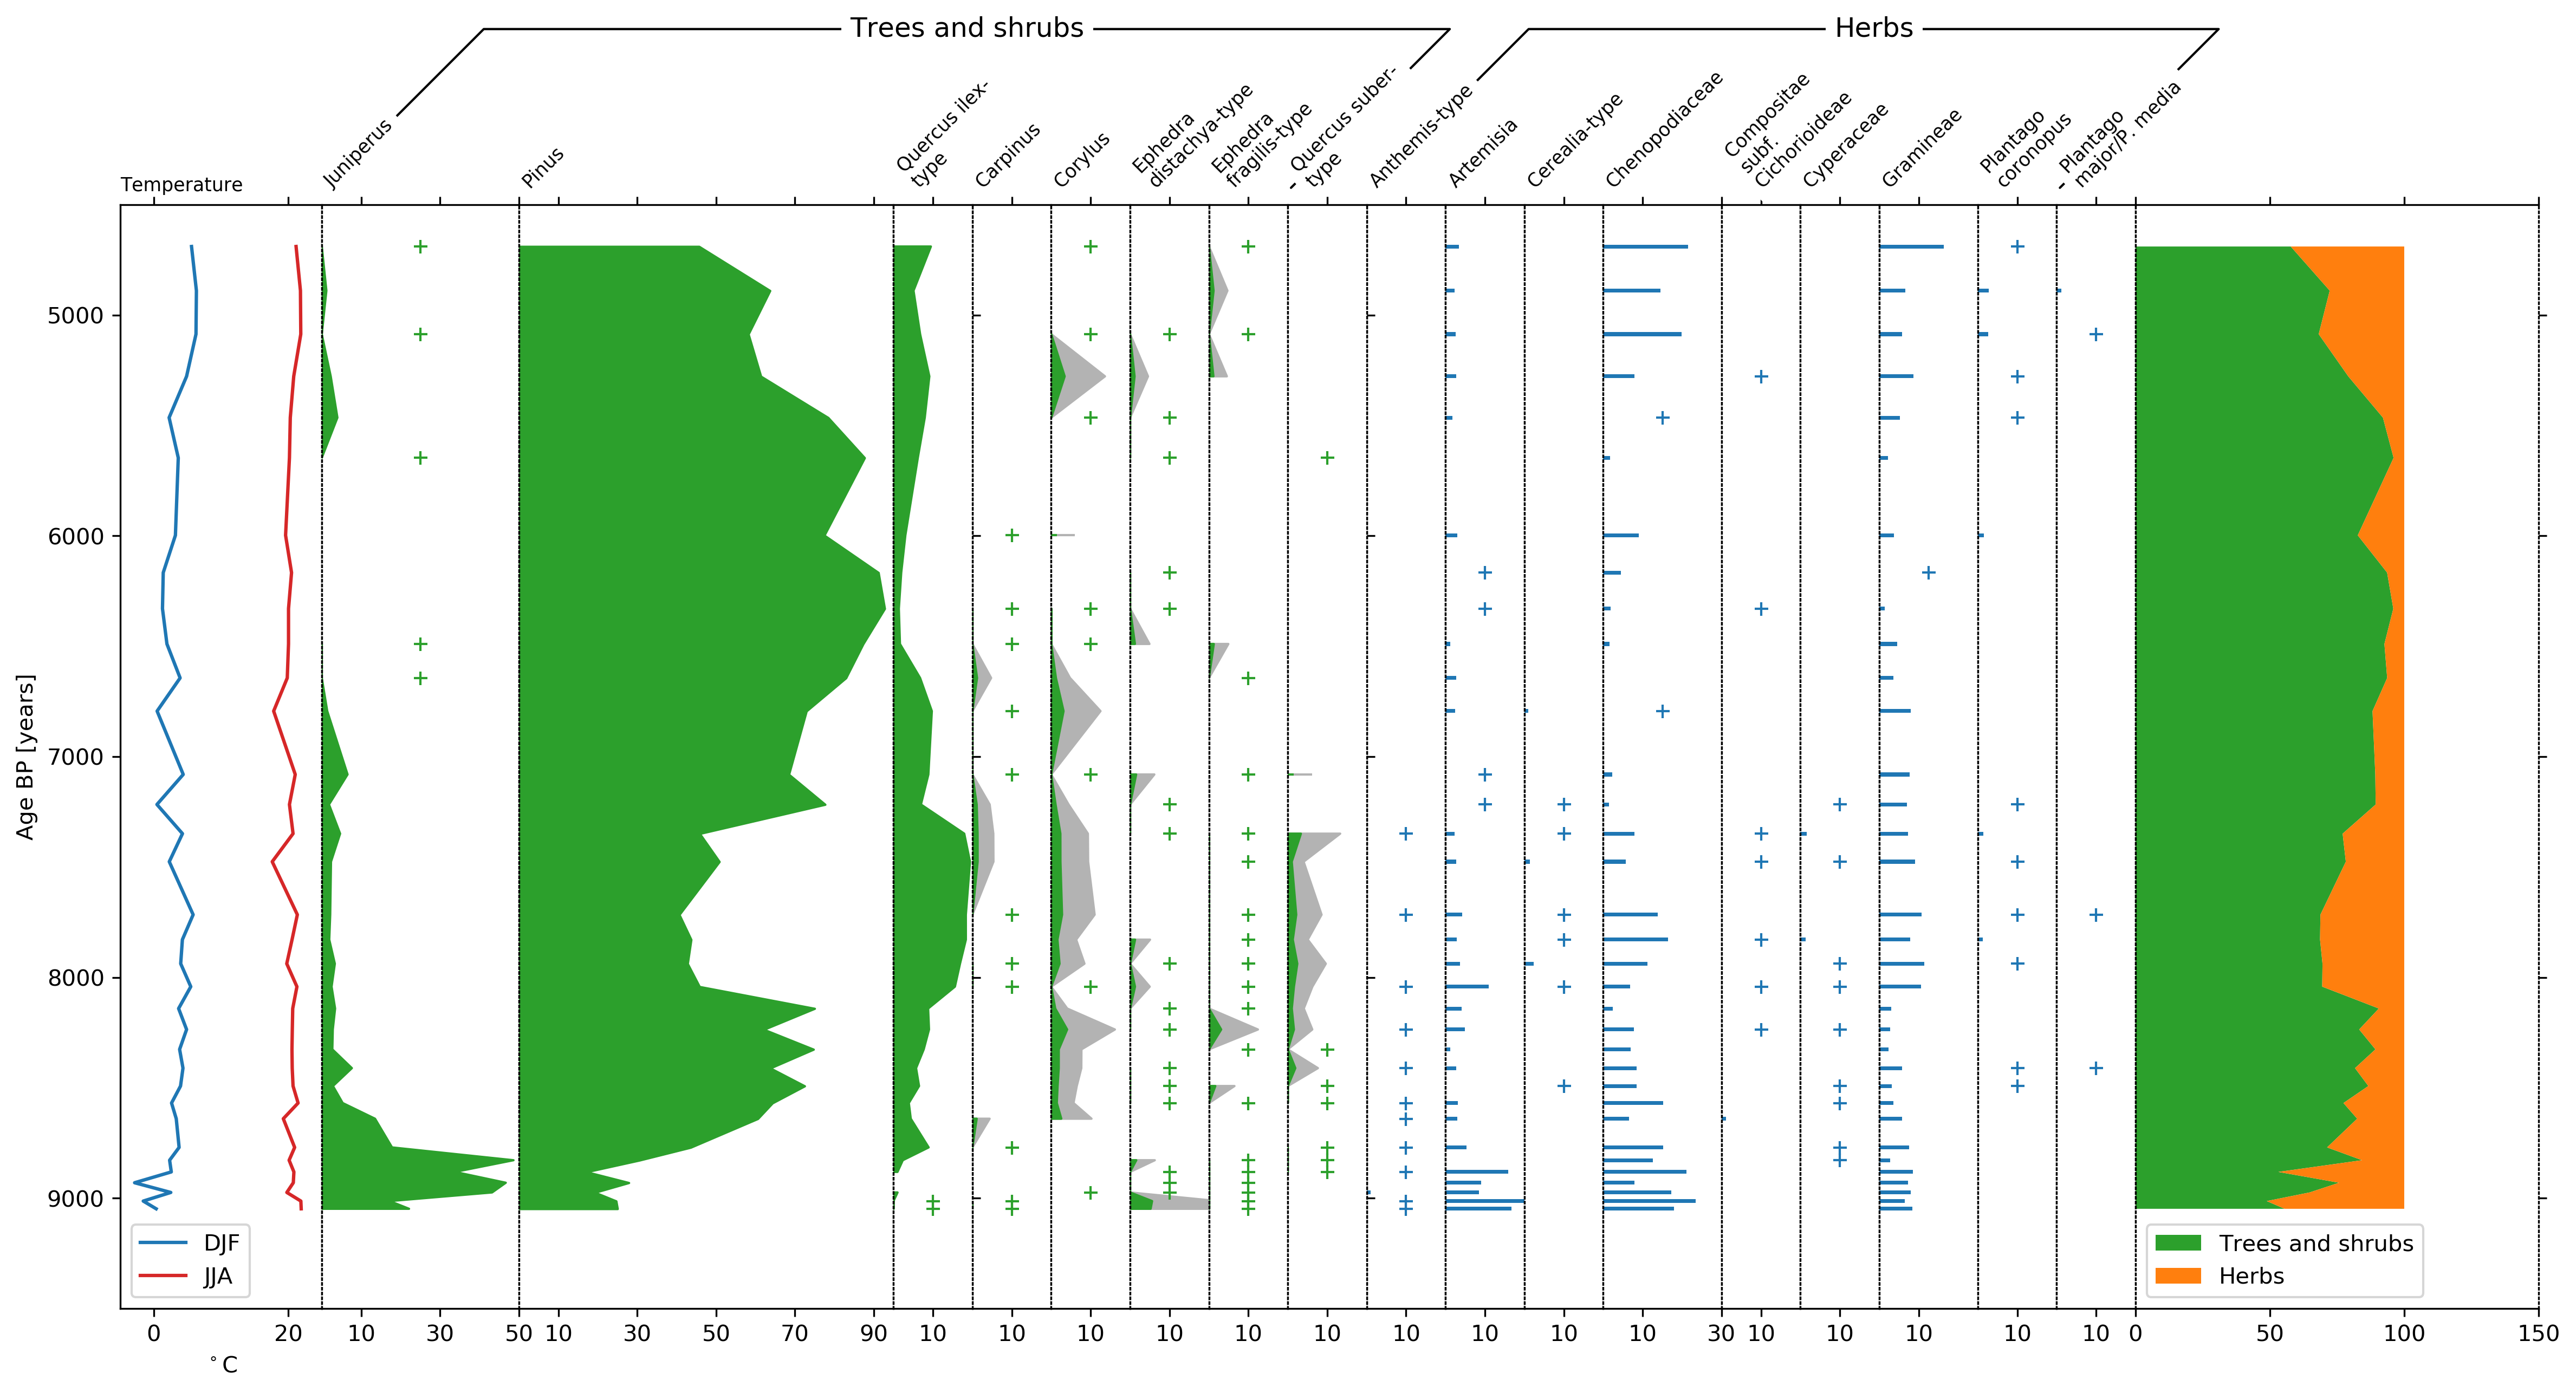

In [11]:
sp, groupers = stratplot(
    df, grouper,
    thresh=1.0,
    trunc_height=0.1,
    use_bars=['Herbs'],
    all_in_one=['Temperature'],
    summed=['Trees and shrubs', 'Herbs'],
    widths={'Temperature': 0.1, 'Pollen': 0.9},
    percentages=['Pollen'],
    calculate_percentages=True,
    subgroups={'Pollen': ['Trees and shrubs', 'Herbs']},
    exclude=['Aquatics', 'Dwarf shrubs', 'Helophytes', 'Nonpollen',
             'Vascular cryptogams (Pteridophytes)'])

# apply a new order where we first display Juniperus, Pinus and Quercus, and then the rest
pollen_grouper = groupers[1]
first_taxa = ['Juniperus', 'Pinus', 'Quercus ilex-type']
remaining_trees = group2taxon['Trees and shrubs'][
    ~group2taxon['Trees and shrubs'].isin(first_taxa)].dropna().tolist()

neworder = first_taxa + remaining_trees
pollen_grouper.reorder(neworder)


# -- psyplot update
blue = '#1f77b4'
orange = '#ff7f0e'
green = '#2ca02c'
red = '#d62728'

# change the color of trees and shrubs to green
sp(group='Trees and shrubs').update(color=[green])

# exaggerate the trees with low counts by a factor of 4
sp(name=remaining_trees).update(exag='areax', exag_factor=4)

# mark small taxon occurences below 1% with a +
sp(maingroup='Pollen').update(occurences=1.0)

# change the color of JJA temperature to red, shorten legend labels and
# change the x- and y-label
sp(group='Temperature').update(color=[blue, red], legendlabels=['DJF', 'JJA'], 
                               ylabel='Age BP [years]', xlabel='$^\circ$C',
                               legend={'loc': 'lower left'})

# change the color of the summed trees and shrubs to green and put the legend
# on the bottom
sp(group='Summed').update(color=[green, orange], legend={'loc': 'lower left'})
sp.export('psy-strat-demo.pdf', bbox_inches='tight')

In [12]:
psy.close('all')

## References
- <a id="Davis2007">Davis, B.A. and Stevenson, A.C., **2007**. The 8.2 ka event and Early–Mid Holocene forests, fires and flooding in the Central Ebro Desert, NE Spain. *Quaternary Science Reviews*, 26(13-14), pp.1695-1712.</a>